In [7]:
# load dataset and split train/test
from sklearn.datasets import load_wine

wine = load_wine()
x=wine.data
y=wine.target


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=2) 

In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

best_score=0
for criterion in ['gini','entropy' ]:
    for max_depth in [2,3,4,5,6,7,8,9,10]:
        tree_giniIndex = DecisionTreeClassifier(criterion = criterion, max_depth=max_depth)
        kfold = KFold(n_splits=10, shuffle = True, random_state=2)
        fold_accuracies = cross_val_score(tree_giniIndex, x_train_scaled, y_train,cv=kfold)
        score = fold_accuracies.mean()
        if score > best_score:
            best_paramC = criterion
            best_paramD = max_depth
            best_score = score

print("Best score on cross-validation: {:2f}".format(best_score))
print("Best parametersC: {}".format(best_paramC))
print("Best parametersD: {}".format(best_paramD))

Best score on cross-validation: 0.909890
Best parametersC: gini
Best parametersD: 3


In [12]:
tree_giniIndex = DecisionTreeClassifier(criterion='gini', max_depth=3)
tree_giniIndex.fit(x_train_scaled, y_train)
test_score = tree_giniIndex.score(x_test_scaled, y_test)
print("Test set score: {:2f}".format(test_score))

Test set score: 0.955556


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

best_score=0
for curPvalue in [1,2]:
    neighbor_settings = range(1,11)
    for curKvalue in neighbor_settings:
        clf = KNeighborsClassifier(n_neighbors = curKvalue, p=curPvalue, metric='minkowski')
        kfold = KFold(n_splits=10, shuffle = True, random_state=2)
        fold_accuracies = cross_val_score(clf, x_train_scaled, y_train,cv=kfold)
        score = fold_accuracies.mean()
        if score > best_score:
            best_paramP = curPvalue
            best_paramK = curKvalue
            best_score = score

print("Best score on cross-validation: {:2f}".format(best_score))
print("Best parametersP: {}".format(best_paramP))
print("Best parametersK: {}".format(best_paramK))

Best score on cross-validation: 0.977473
Best parametersP: 1
Best parametersK: 1


In [18]:
clf = KNeighborsClassifier(p=1, n_neighbors=1)
clf.fit(x_train_scaled, y_train)
test_score = clf.score(x_test_scaled, y_test)
print("Test set score: {:2f}".format(test_score))

Test set score: 0.977778


In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

best_score=0
for degree in [2,3,4]:
    for curC in [1, 2,3,4,5,8,10]:
        for gamma in [1/13, 2/13, 3/13, 4/13]:
            svm = SVC(kernel = "poly", degree = degree, C=curC, gamma = gamma)
            kfold = KFold(n_splits=10, shuffle = True, random_state=2)
            fold_accuracies = cross_val_score(svm, x_train_scaled, y_train,cv=kfold)
            score = fold_accuracies.mean()
            if score > best_score:
                best_paramD = degree
                best_paramC = curC
                best_paramG = gamma
                best_score = score

print("Best score on cross-validation: {:2f}".format(best_score))
print("Best parametersD: {}".format(best_paramD))
print("Best parametersC: {}".format(best_paramC))
print("Best parametersG: {}".format(best_paramG))

Best score on cross-validation: 0.947253
Best parametersD: 3
Best parametersC: 1
Best parametersG: 0.15384615384615385


In [19]:
svm = SVC(degree= 3, C=1, gamma=2/13)
svm.fit(x_train_scaled, y_train)
test_score = svm.score(x_test_scaled, y_test)
print("Test set score: {:2f}".format(test_score))

Test set score: 0.955556


In [43]:
from sklearn.naive_bayes import GaussianNB

gaussian_model = GaussianNB()
gaussian_model.fit(x_train_scaled, y_train)
test_score =gaussian_model.score(x_test_scaled, y_test)
print("Test set score: {:2f}".format(test_score))

Test set score: 0.977778


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_predicted_tree = tree_giniIndex.predict(x_test_scaled)
print(accuracy_score(y_predicted_tree, y_test))
print(precision_score(y_predicted_tree, y_test, average='macro'))
print(recall_score(y_predicted_tree, y_test, average='macro'))


0.9555555555555556
0.9649122807017544
0.9555555555555556


Text(91.68, 0.5, 'predicted label')

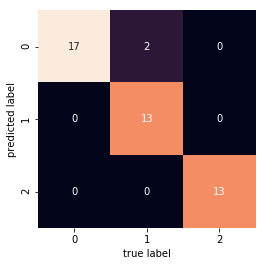

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_predicted_tree, y_test)
sns.heatmap(mat.T, square=True, annot = True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [35]:
y_predicted_knn = clf.predict(x_test_scaled)
print(accuracy_score(y_predicted_knn, y_test))
print(precision_score(y_predicted_knn, y_test, average='macro'))
print(recall_score(y_predicted_knn, y_test, average='macro'))


0.9777777777777777
0.9743589743589745
0.9833333333333334


Text(91.68, 0.5, 'predicted label')

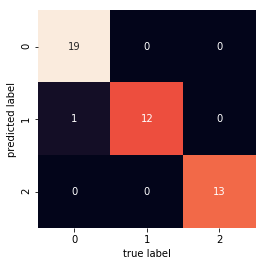

In [37]:
mat = confusion_matrix(y_predicted_knn, y_test)
sns.heatmap(mat.T, square=True, annot = True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [38]:
y_predicted_svm = svm.predict(x_test_scaled)
print(accuracy_score(y_predicted_svm, y_test))
print(precision_score(y_predicted_svm, y_test, average='macro'))
print(recall_score(y_predicted_svm, y_test, average='macro'))


0.9555555555555556
0.9568151147098515
0.9555555555555556


Text(91.68, 0.5, 'predicted label')

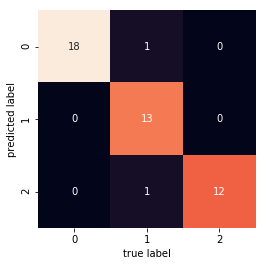

In [39]:
mat = confusion_matrix(y_predicted_svm, y_test)
sns.heatmap(mat.T, square=True, annot = True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [40]:
y_predictedNB = gaussian_model.predict(x_test_scaled)
print(accuracy_score(y_predictedNB, y_test))
print(precision_score(y_predictedNB, y_test, average='macro'))
print(recall_score(y_predictedNB, y_test, average='macro'))


0.9777777777777777
0.9824561403508771
0.9761904761904763


Text(91.68, 0.5, 'predicted label')

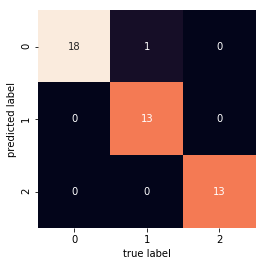

In [42]:
mat = confusion_matrix(y_predictedNB, y_test)
sns.heatmap(mat.T, square=True, annot = True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')